In [ ]:
# @title 21. Train a KNN Classifier on the Iris dataset and print model accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of KNN Classifier on Iris dataset: {accuracy:.2f}")

Accuracy of KNN Classifier on Iris dataset: 1.00


In [ ]:
# @title  22.Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)

from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Create synthetic regression data
X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error of KNN Regressor: {mse:.2f}")

Mean Squared Error of KNN Regressor: 340.60


In [ ]:
#@title 23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_iris()
X, y = data.data, data.target

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. KNN with Euclidean Distance
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)

# 5. KNN with Manhattan Distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)

# 6. Compare results
print(f"Accuracy (Euclidean): {acc_euclidean:.2f}")
print(f"Accuracy (Manhattan): {acc_manhattan:.2f}")

Accuracy (Euclidean): 1.00
Accuracy (Manhattan): 1.00


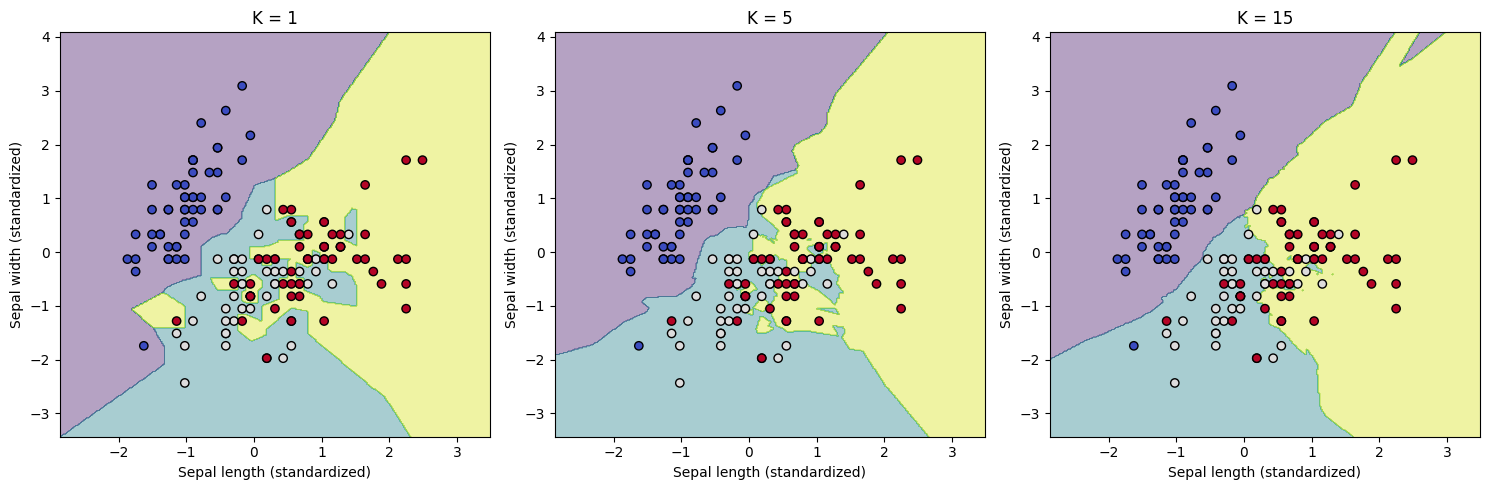

In [ ]:
# @title 24. Train a KNN Classifier with different values of K and visualize decision boundaried


import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
X = iris.data[:, :2]  # Use first two features (sepal length and width)
y = iris.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Mesh grid for plotting
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot decision boundary for different values of K
Ks = [1, 5, 15]
plt.figure(figsize=(15, 5))

for i, k in enumerate(Ks, 1):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(f"K = {k}")
    plt.xlabel('Sepal length (standardized)')
    plt.ylabel('Sepal width (standardized)')

plt.tight_layout()
plt.show()

In [ ]:
# @title 25. Apply Feature Scaling before training a KNN model and compare results with unscaled data.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_iris()
X, y = data.data, data.target

# 2. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. KNN WITHOUT scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# 4. KNN WITH feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# 5. Compare results
print(f"Accuracy WITHOUT Scaling: {acc_unscaled:.2f}")
print(f"Accuracy WITH Scaling:    {acc_scaled:.2f}")

Accuracy WITHOUT Scaling: 1.00
Accuracy WITH Scaling:    1.00


In [ ]:
# @title 26. Train a PCA model on synthetic data and print the explained variance ratio for each component5

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import numpy as np

# 1. Generate synthetic data (1000 samples, 5 features)
X, _ = make_classification(n_samples=1000, n_features=5,
                           n_informative=3, n_redundant=1,
                           random_state=42)

# 2. Apply PCA (all components)
pca = PCA(n_components=5)
pca.fit(X)

# 3. Print explained variance ratio
print("Explained Variance Ratio for each component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Component {i+1}: {ratio:.4f}")

# Optional: cumulative variance
cumulative = np.cumsum(pca.explained_variance_ratio_)
print(f"\nCumulative Variance Explained (first 3 components): {cumulative[2]:.4f}")

Explained Variance Ratio for each component:
Component 1: 0.3866
Component 2: 0.3156
Component 3: 0.1527
Component 4: 0.1452
Component 5: 0.0000

Cumulative Variance Explained (first 3 components): 0.8548


In [ ]:
# @title 26. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# WITHOUT PCA
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
acc_no_pca = accuracy_score(y_test, knn.predict(X_test_scaled))

# WITH PCA (retain 2 components for simplicity)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, knn_pca.predict(X_test_pca))

print(f"Accuracy WITHOUT PCA: {acc_no_pca:.2f}")
print(f"Accuracy WITH PCA:    {acc_pca:.2f}")

Accuracy WITHOUT PCA: 1.00
Accuracy WITH PCA:    0.96


In [ ]:
#@title 27. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV5
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load and split the data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNN and GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", round(grid_search.best_score_, 4))

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3}
Best Cross-Validated Accuracy: 0.9429


In [ ]:
#@title 28. Train a KNN Classifier and check the number of misclassified samples5

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load and split the data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred = knn.predict(X_test_scaled)

# Count misclassified samples
misclassified = (y_pred != y_test).sum()
print(f"Number of misclassified samples: {misclassified}")

Number of misclassified samples: 0


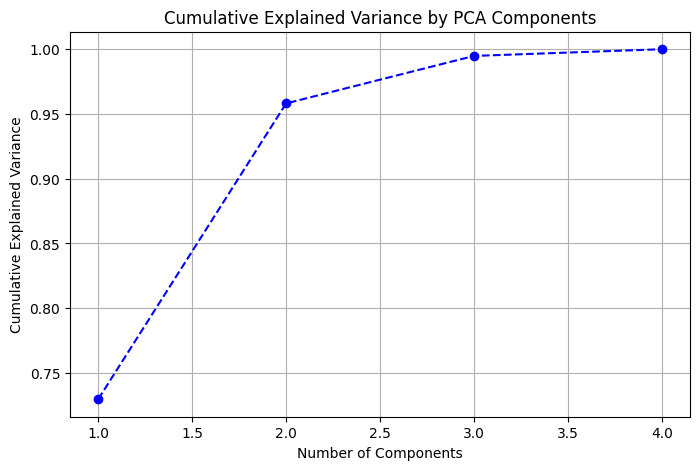

In [ ]:
#title 29. Train a PCA model and visualize the cumulative explained variance.
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Load and scale the data
X, y = load_iris(return_X_y=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Get cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot it
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [ ]:
# @title 31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load and split data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Uniform weights
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train_scaled, y_train)
acc_uniform = accuracy_score(y_test, knn_uniform.predict(X_test_scaled))

# Distance-based weights
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train_scaled, y_train)
acc_distance = accuracy_score(y_test, knn_distance.predict(X_test_scaled))

print(f"Accuracy with 'uniform' weights:  {acc_uniform:.2f}")
print(f"Accuracy with 'distance' weights: {acc_distance:.2f}")

Accuracy with 'uniform' weights:  1.00
Accuracy with 'distance' weights: 1.00


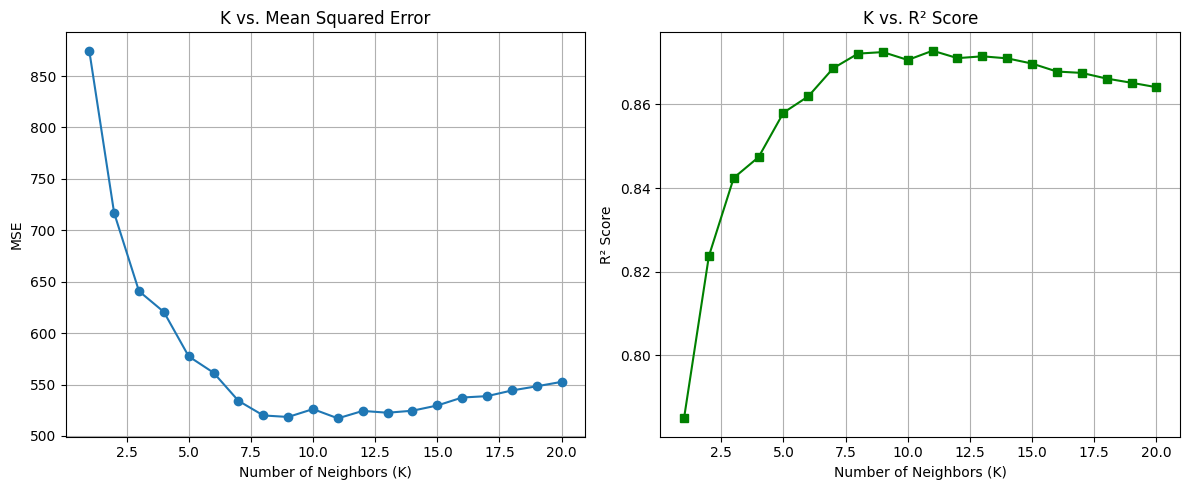

In [ ]:
# @title 32.Train a KNN Regressor and analyze the effect of different K values on performance.
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=1, noise=20, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try different values of K and collect performance
k_values = range(1, 21)
mse_scores = []
r2_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Plot performance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, mse_scores, marker='o')
plt.title("K vs. Mean Squared Error")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("MSE")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, r2_scores, marker='s', color='green')
plt.title("K vs. R² Score")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("R² Score")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#@title 32. Implement KNN Imputation for handling missing values in a dataset
import numpy as np
from sklearn.datasets import load_iris
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
X, y = load_iris(return_X_y=True)

# Introduce missing values randomly
rng = np.random.RandomState(42)
missing_mask = rng.rand(*X.shape) < 0.1  # 10% missing
X_missing = X.copy()
X_missing[missing_mask] = np.nan

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X_missing)

# Optional: Train/test split and scale
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a classifier after imputation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print(f"Accuracy after KNN Imputation: {accuracy_score(y_test, y_pred):.2f}")

Accuracy after KNN Imputation: 1.00


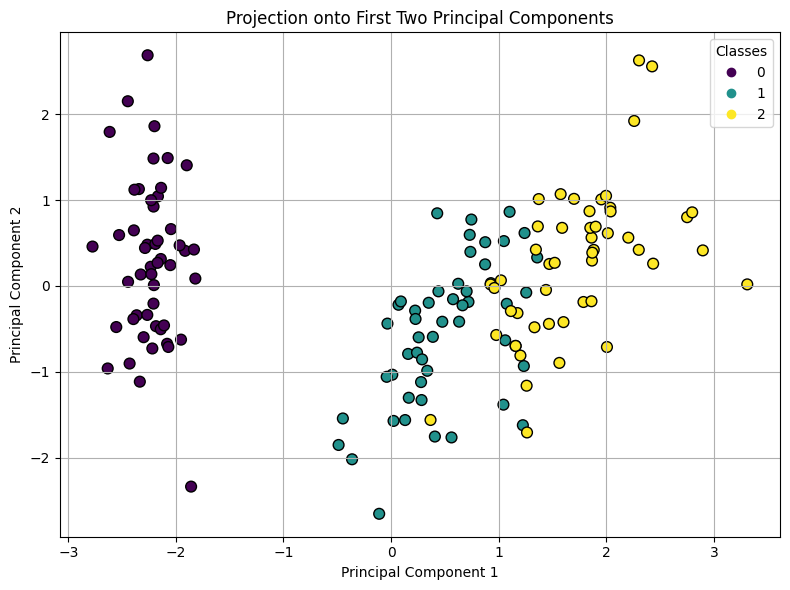

In [ ]:
#@title 34. Train a PCA model and visualize the data projection onto the first two principal components
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load and scale the data
X, y = load_iris(return_X_y=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot projection
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=60)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Projection onto First Two Principal Components")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#@title 35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Load and scale data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate algorithm performance
def evaluate_knn(algorithm_name):
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algorithm_name)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    duration = time.time() - start
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, duration

# Evaluate both algorithms
acc_kd, time_kd = evaluate_knn('kd_tree')
acc_ball, time_ball = evaluate_knn('ball_tree')

print(f"KD Tree - Accuracy: {acc_kd:.2f}, Time: {time_kd:.4f} sec")
print(f"Ball Tree - Accuracy: {acc_ball:.2f}, Time: {time_ball:.4f} sec")

KD Tree - Accuracy: 1.00, Time: 0.0092 sec
Ball Tree - Accuracy: 1.00, Time: 0.0084 sec


In [ ]:
 #@title 35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Load and scale data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate algorithm performance
def evaluate_knn(algorithm_name):
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algorithm_name)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    duration = time.time() - start
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, duration

# Evaluate both algorithms
acc_kd, time_kd = evaluate_knn('kd_tree')
acc_ball, time_ball = evaluate_knn('ball_tree')

print(f"KD Tree - Accuracy: {acc_kd:.2f}, Time: {time_kd:.4f} sec")
print(f"Ball Tree - Accuracy: {acc_ball:.2f}, Time: {time_ball:.4f} sec")

KD Tree - Accuracy: 1.00, Time: 0.0049 sec
Ball Tree - Accuracy: 1.00, Time: 0.0051 sec


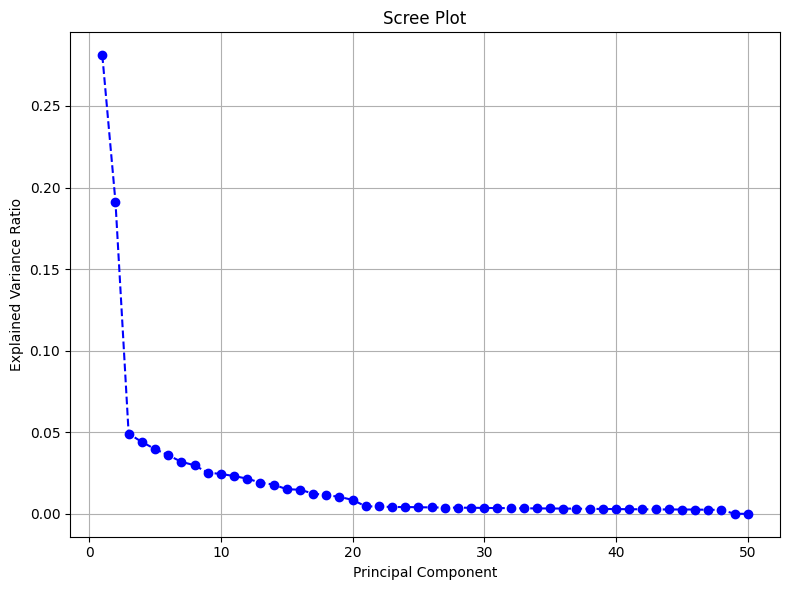

In [ ]:
#@title 36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# Generate synthetic high-dimensional data (1000 samples, 50 features)
X, _ = make_classification(n_samples=1000, n_features=50, n_informative=20, random_state=42)

# Apply PCA
pca = PCA()
pca.fit(X)

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, X.shape[1] + 1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#@title 37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load and split data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred = knn.predict(X_test_scaled)

# Calculate Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Display classification report
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



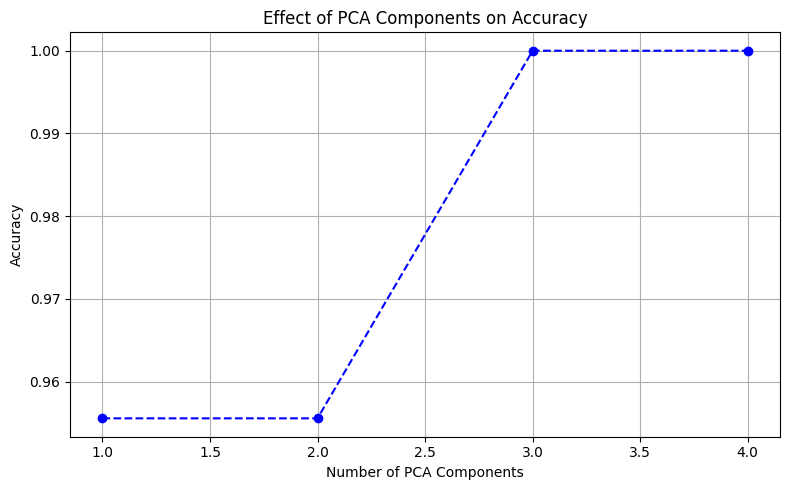

In [ ]:
#@title 38. Train a PCA model and analyze the effect of different numbers of components on accuracy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load and scale data
X, y = load_iris(return_X_y=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# List to store accuracies
accuracies = []

# Try different numbers of components (1 to 4 for the Iris dataset)
for n_components in range(1, X_scaled.shape[1] + 1):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs number of PCA components
plt.figure(figsize=(8, 5))
plt.plot(range(1, X_scaled.shape[1] + 1), accuracies, marker='o', linestyle='--', color='b')
plt.title('Effect of PCA Components on Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

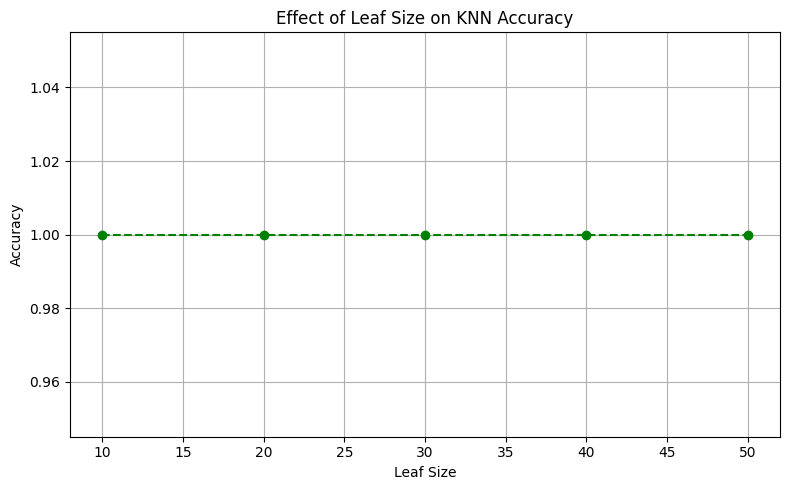

In [ ]:
#@title 39. Train a KNN Classifier with different leaf_size values and compare accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load and scale data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test with different leaf_size values
leaf_sizes = [10, 20, 30, 40, 50]
accuracies = []

for leaf_size in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', leaf_size=leaf_size)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot leaf_size vs accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(leaf_sizes, accuracies, marker='o', linestyle='--', color='g')
plt.title('Effect of Leaf Size on KNN Accuracy')
plt.xlabel('Leaf Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

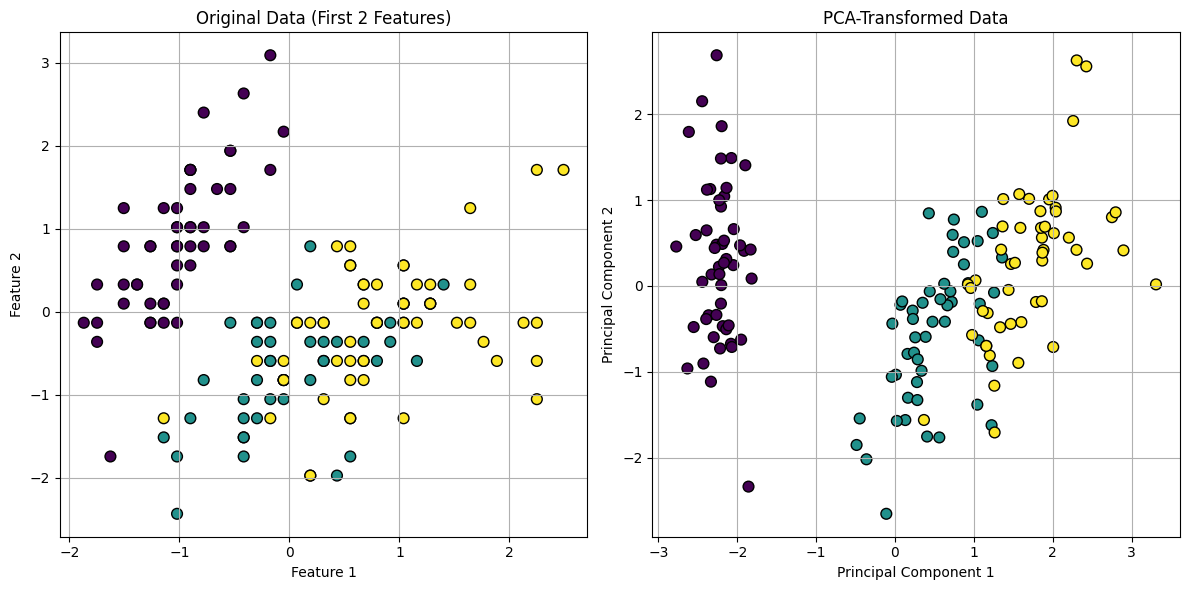

In [1]:
#@title 40. Train a PCA model and visualize how data points are transformed before and after PCA

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load and scale data
X, y = load_iris(return_X_y=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot original data (first two features) vs. PCA-transformed data
plt.figure(figsize=(12, 6))

# Original data (First two features)
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k', s=60)
plt.title("Original Data (First 2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

# PCA-transformed data
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=60)
plt.title("PCA-Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#@title 41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict and print report
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      0.90      0.95        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [ ]:
#@title 43.Train a KNN Regressor and analyze the effect of different distance metrics on prediction error

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try different distance metrics
metrics = ['euclidean', 'manhattan', 'minkowski']
for metric in metrics:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Metric: {metric}, MSE: {mse:.4f}")

Metric: euclidean, MSE: 0.4295
Metric: manhattan, MSE: 0.3813
Metric: minkowski, MSE: 0.4295


In [ ]:
#@title 44. Train a KNN Classifier and evaluate using ROC-AUC score

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict probabilities and calculate ROC-AUC
y_proba = knn.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

In [ ]:
#@title 45.Train a PCA model and visualize the variance captured by each principal component

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Load and scale data
data = load_wine()
X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
#@title 46. Train a KNN Classifier and perform feature selection before training

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load data
data = load_wine()
X, y = data.data, data.target

# Chi2 requires non-negative values, so use MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection
selector = SelectKBest(score_func=chi2, k=5)
X_selected = selector.fit_transform(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=data.target_names))

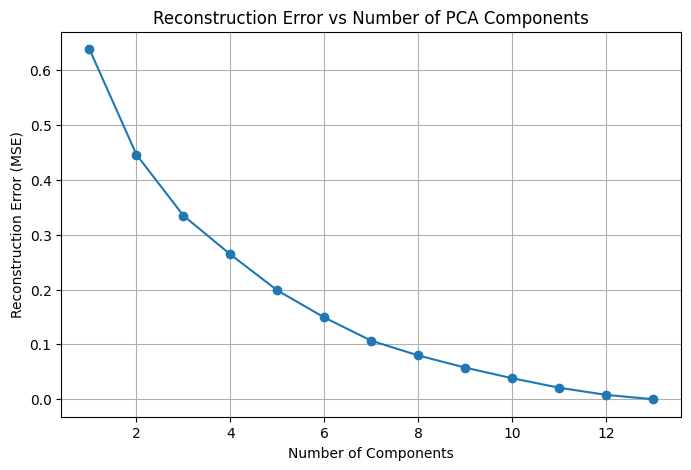

In [ ]:
#@title 47.Train a PCA model and visualize the data reconstruction error after reducing dimensions

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and scale data
data = load_wine()
X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different numbers of components and calculate reconstruction error
errors = []
components_range = range(1, X.shape[1] + 1)

for n in components_range:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    X_reconstructed = pca.inverse_transform(X_pca)
    error = mean_squared_error(X_scaled, X_reconstructed)
    errors.append(error)

# Plot reconstruction error
plt.figure(figsize=(8, 5))
plt.plot(components_range, errors, marker='o')
plt.title('Reconstruction Error vs Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.grid(True)
plt.show()

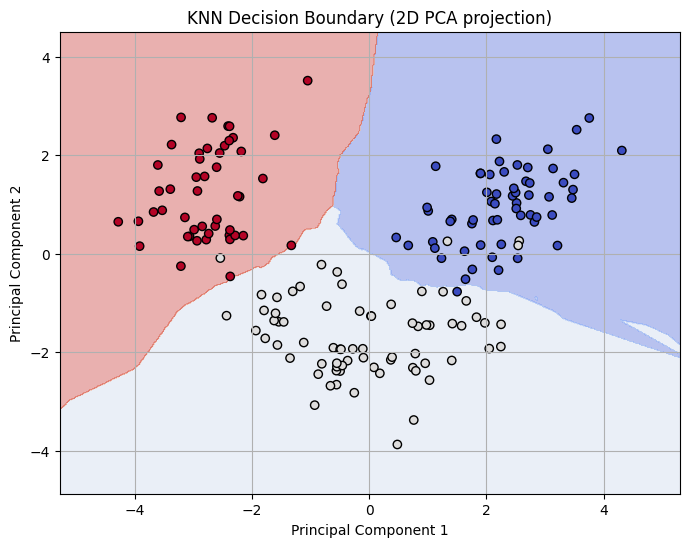

In [ ]:
#@title 48.Train a KNN Classifier and visualize the decision boundary

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load and scale data
data = load_wine()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Plot decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("KNN Decision Boundary (2D PCA projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()